In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# from keras standard datasets, get mnist dataset

(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Show dataset sizes

In [3]:
# check image sizes in the data sets
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Show one of the images from training dataset

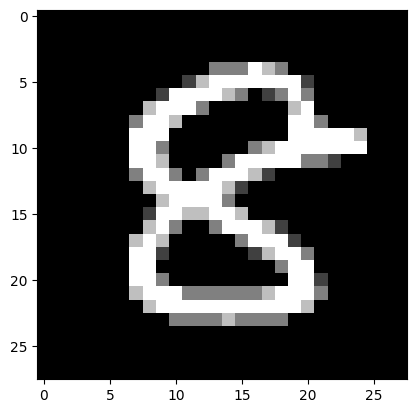

train_label: 8


In [8]:
imageNum = 3872
plt.imshow(train_images[imageNum], cmap='gray')
plt.show()
print(f'train_label: {train_labels[imageNum]}')

Show ten images with labels from the training dataset

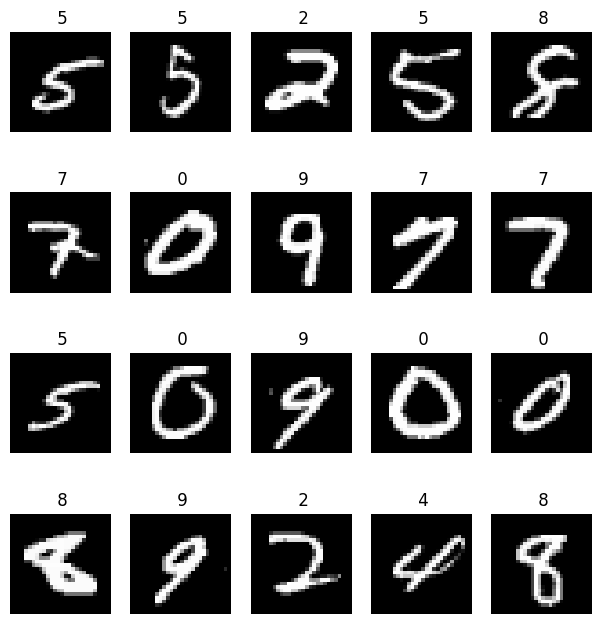

In [12]:
iStart = 513
numOfRows = 4
numOfCols = 5
numOfImages = numOfRows*numOfCols
iEnd = iStart + numOfImages
fig, axes = plt.subplots(numOfRows, numOfCols,
                         figsize = (1.5*numOfCols, 2.0*numOfRows))
for im in range( iStart, iEnd ):
  i = (im - iStart) // numOfCols
  j = (im - iStart) %  numOfCols
  ax = axes[i,j]
  ax.imshow(train_images[im], cmap='gray', )
  ax.set_title(' {}'.format(train_labels[im]))
  ax.axis('off')
# plt.tight_layout()
# fig.show

In [13]:
# normalize images
# print(train_images[0])
train_images = train_images / 255.0
test_images = test_images / 255.0
# print(train_images[0])

## Model Creation and Set Its Architecture
Set up the neural network architecture to create a neural neural network model to solve our classification problem


In [15]:
# create
nnModel = tf.keras.models.Sequential()

# add the input layer
#.    our input is of 28x28 shape, Flatten converts it into 1D array
nnModel.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# add a hidden layer
#.    A dense layer means that all neurons in this layer are
#.    connected with all the neurons in the previous layer.
#.    It is customary to use a power of 2 as number of neurons.
nnModel.add(tf.keras.layers.Dense(128, activation='relu'))

# add the output layer (for ten digits, we use 10 outputs)
nnModel.add(tf.keras.layers.Dense(10, activation='softmax'))

## Compiling the Model

Now the model is ready for compilation: Means (1) checking for any model format errors, (2) define the loss/cost function, (3) set the learning rate or the optimizer used, and (4) other metrics.

Compiling is need for training, but is not needed for predicting/testing.

In [16]:
nnModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the Neural Network Model

In [17]:
numOfEpochs = 10
history = nnModel.fit(train_images, train_labels, epochs=numOfEpochs)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8804 - loss: 0.4287
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9650 - loss: 0.1160
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9770 - loss: 0.0781
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9822 - loss: 0.0568
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9863 - loss: 0.0449
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9897 - loss: 0.0340
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9916 - loss: 0.0284
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9939 - loss: 0.0210
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9948 - loss: 0.0182
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9959 - loss: 0.0142


## Plot training loss and accuracy

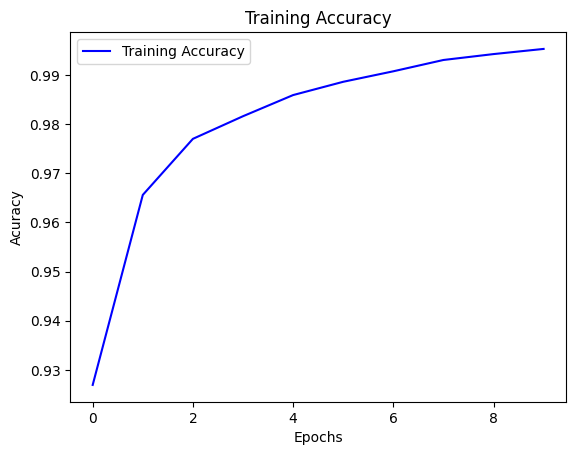

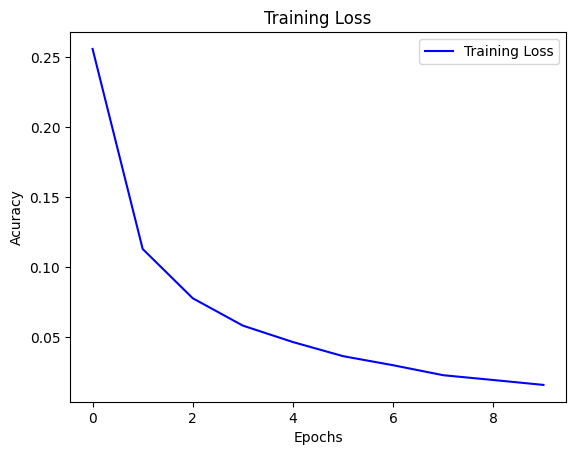

In [18]:
epochRange = range(numOfEpochs)
plt.plot(epochRange, history.history['accuracy'], 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acuracy')
plt.legend()
plt.show()


plt.plot(epochRange, history.history['loss'], 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Acuracy')
plt.legend()
plt.show()


## Test the Neural Network Model

In [ ]:
test_loss, test_acc = nnModel.evaluate(test_images, test_labels)
print('Test loss = ', test_loss)
print('Test accuracy = ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9757
Test loss =  0.09333141893148422
Test accuracy =  0.9757000207901001


## Saving the Model for Future Use

In [ ]:
nnModel.save('my_nnModel')

## Loading a Saved Model

In [ ]:
new_nnModel = tf.keras.models.load_model('my_nnModel')

## Check The Saved Model
So, now we can check if the save model gives us the same results on the test data or not.

In [ ]:
new_loss, new_acc = new_nnModel.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9757
